<a href="https://colab.research.google.com/github/kishore-klassy/FashionAnalyzer/blob/main/fashionAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

paramaggarwal_fashion_product_images_dataset_path = kagglehub.dataset_download('paramaggarwal/fashion-product-images-dataset')
kishorekumar0912_men_coat_path = kagglehub.dataset_download('kishorekumar0912/men-coat')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Set the path to the file you'd like to load
dataset = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"

os.listdir(dataset)

['images.csv', 'images', 'styles.csv', 'styles', 'fashion-dataset']

In [ ]:
import pandas as pd
import os

# Load CSV files
styles_df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')
images_df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv", on_bad_lines='skip')

# Display first few rows of styles.csv
print("Styles.csv - First 5 Rows:")
display(styles_df.head())


Styles.csv - First 5 Rows:


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
# Display first few rows of images.csv
print("Images.csv - First 5 Rows:")
display(images_df.head())


Images.csv - First 5 Rows:


,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
# Check column names and data types
print("\nStyles.csv - Column Info:")
print(styles_df.info())



Styles.csv - Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None


In [ ]:
print("\nImages.csv - Column Info:")
print(images_df.info())


Images.csv - Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  44446 non-null  object
 1   link      44446 non-null  object
dtypes: object(2)
memory usage: 694.6+ KB
None


In [ ]:
# Check for missing values
print("\nMissing Values in Styles.csv:")
print(styles_df.isnull().sum())

print("\nMissing Values in Images.csv:")
print(images_df.isnull().sum())


Missing Values in Styles.csv:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

Missing Values in Images.csv:
filename    0
link        0
dtype: int64


In [ ]:
# Get unique values in key columns (to understand categories)
print("\nUnique Values in Styles.csv Columns:")
for col in styles_df.columns:
    print(f"{col}: {styles_df[col].nunique()} unique values")


Unique Values in Styles.csv Columns:
id: 44424 unique values
gender: 5 unique values
masterCategory: 7 unique values
subCategory: 45 unique values
articleType: 143 unique values
baseColour: 46 unique values
season: 4 unique values
year: 13 unique values
usage: 8 unique values
productDisplayName: 31121 unique values


In [ ]:
# Check how images are stored
image_folder = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"
print("\nTotal Image Files:", len(os.listdir(image_folder)))

# Display a few random image file names
print("Sample Image File Names:")
print(os.listdir(image_folder)[:10])


Total Image Files: 44441
Sample Image File Names:
['31973.jpg', '30778.jpg', '19812.jpg', '22735.jpg', '38246.jpg', '16916.jpg', '52876.jpg', '39500.jpg', '44758.jpg', '59454.jpg']


Above are metadata retrieval

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

In [ ]:
# Set dataset path
dataset_path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"
styles_csv = os.path.join(dataset_path, "styles.csv")
images_path = os.path.join(dataset_path, "images")

# Load the dataset
styles_df = pd.read_csv(styles_csv, on_bad_lines='skip')

In [ ]:
# Display first few rows
print("First 5 Rows:")
print(styles_df.head())

First 5 Rows:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(styles_df.isnull().sum())

# Drop missing values for now (can be handled better later)
styles_df.dropna(inplace=True)


Missing Values:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


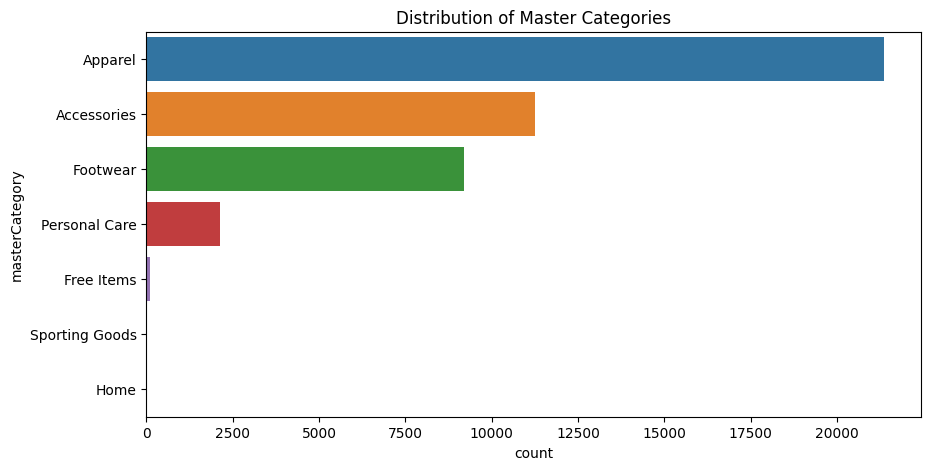

In [ ]:
# Visualize class distributions
plt.figure(figsize=(10, 5))
sns.countplot(y=styles_df["masterCategory"], order=styles_df["masterCategory"].value_counts().index)
plt.title("Distribution of Master Categories")
plt.show()

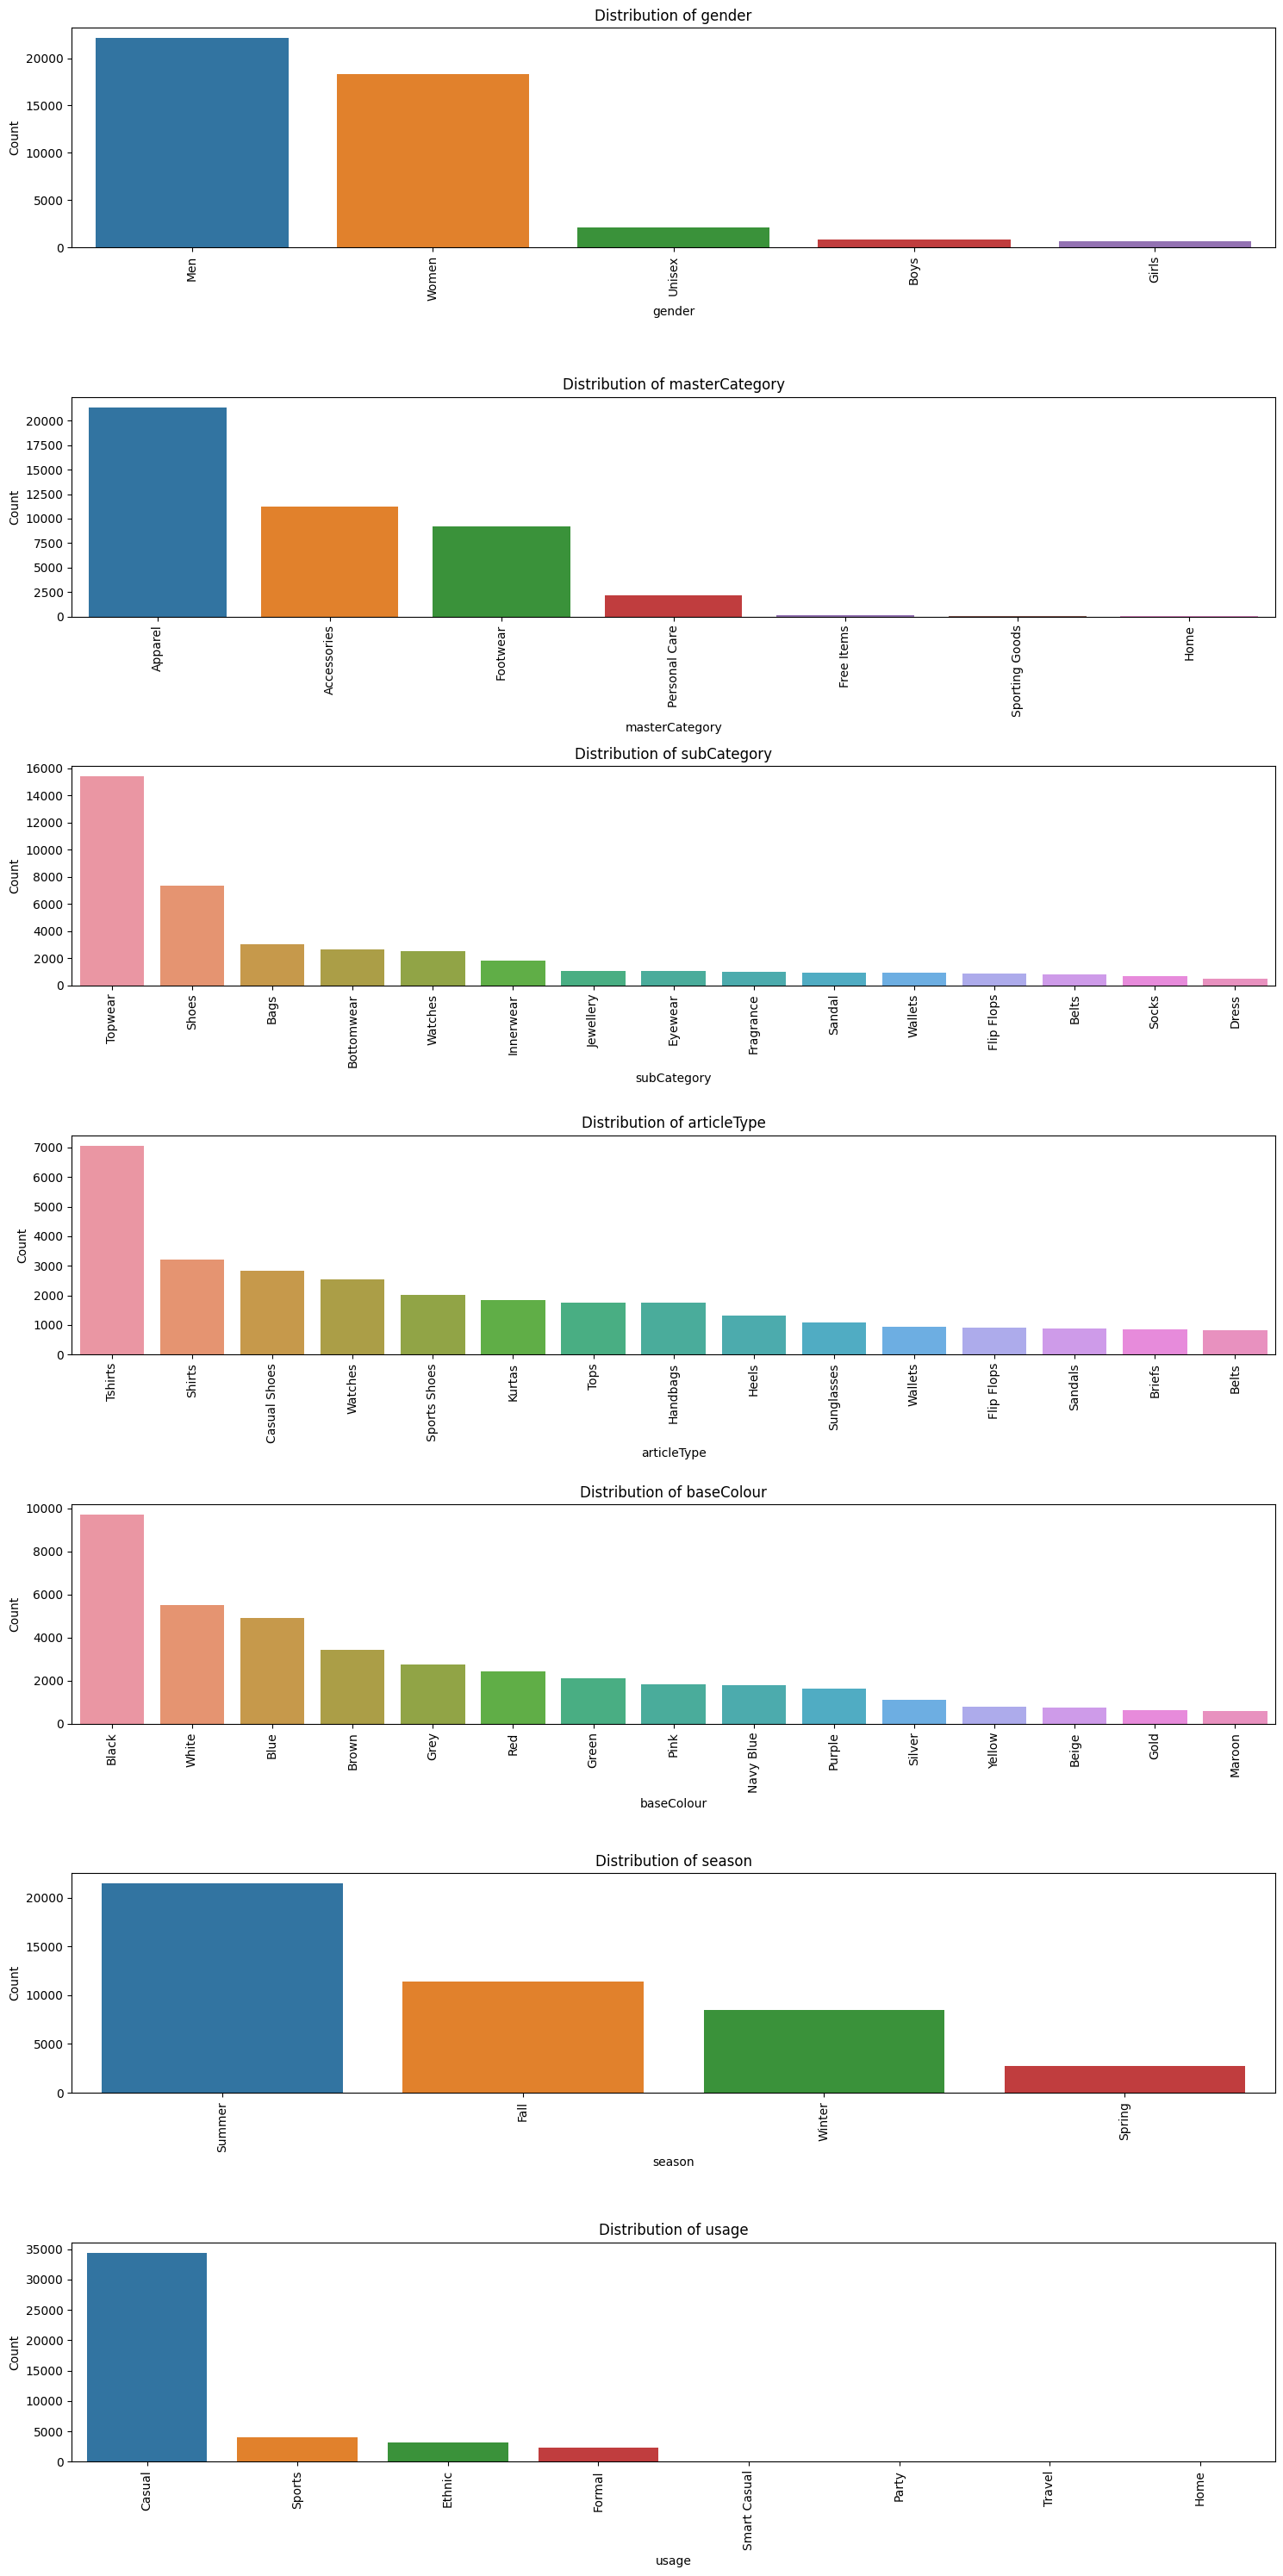

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting categorical columns
categorical_cols = ["gender", "masterCategory", "subCategory", "articleType", "baseColour", "season", "usage"]

# Creating subplots
fig, ax = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(15, 30))
ax = ax.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = styles_df[col].value_counts().sort_values(ascending=False).head(15)  # Top 15 categories
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count")
    ax[i].tick_params(axis="x", rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


HANDLING MISSING VALUES

In [ ]:
# Checking missing values
missing_values = styles_df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Filling missing values correctly
styles_df = styles_df.assign(
    baseColour=styles_df["baseColour"].fillna("Unknown"),
    season=styles_df["season"].fillna(styles_df["season"].mode()[0]),
    year=styles_df["year"].fillna(styles_df["year"].median()),
    usage=styles_df["usage"].fillna("Unknown"),
    productDisplayName=styles_df["productDisplayName"].fillna("No Name"),
)

# Verifying if missing values are handled
print("\nMissing Values after handling:\n", styles_df.isnull().sum().sum())


Missing Values:
 Series([], dtype: int64)

Missing Values after handling:
 0


# ENCODING CATEGORICAL FEATURES

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ["gender", "masterCategory", "subCategory", "articleType", "baseColour", "season", "usage"]

# Initialize LabelEncoders
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    styles_df[col] = le.fit_transform(styles_df[col])
    label_encoders[col] = le  # Save encoders for later use (inverse transform if needed)

# Verifying encoding
print(styles_df[categorical_cols].head())


   gender  masterCategory  subCategory  articleType  baseColour  season  usage
0       2               1           38          103          25       0      0
1       2               1            6           56           2       2      0
2       4               0           42          139          37       3      0
3       2               1            6          127           1       0      0
4       2               1           38          133          13       2      0


# Train-Test Split & Data Preprocessing for CNN

In [ ]:
import torch
import os
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

In [ ]:
# Define image directory
image_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"

# Load image paths and labels
image_paths = []
labels = []

for idx, row in styles_df.iterrows():
    img_path = os.path.join(image_dir, str(row["id"]) + ".jpg")
    if os.path.exists(img_path):  # Check if the image exists
        image_paths.append(img_path)
        labels.append(str(row["articleType"]))  # Store labels as strings

# Convert to DataFrame
df = pd.DataFrame({"filename": image_paths, "label": labels})

# Remove missing values if any
df.dropna(inplace=True)

# Encode labels as category indices
label_to_index = {label: idx for idx, label in enumerate(sorted(df["label"].unique()))}
df["label"] = df["label"].map(label_to_index)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df["filename"], df["label"], test_size=0.2, random_state=42
)

# Convert to DataFrame format
train_df = pd.DataFrame({"filename": X_train, "label": y_train})
test_df = pd.DataFrame({"filename": X_test, "label": y_test})

# Find common classes between train and test sets
common_classes = set(train_df["label"]) & set(test_df["label"])

# Filter datasets to only keep common classes
train_df = train_df[train_df["label"].isin(common_classes)]
test_df = test_df[test_df["label"].isin(common_classes)]

# Print class distribution
print(f"Final Train Set: {train_df.shape[0]} images across {train_df['label'].nunique()} classes")
print(f"Final Test Set: {test_df.shape[0]} images across {test_df['label'].nunique()} classes")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 🔹 Encode labels into integers
label_encoder = LabelEncoder()
train_df["encoded_label"] = label_encoder.fit_transform(train_df["label"])
test_df["encoded_label"] = label_encoder.transform(test_df["label"])

# ✅ Updated Dataset Class with Integer Labels
class FashionDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]["filename"]
        label = self.dataframe.iloc[idx]["encoded_label"]  # ✅ Use encoded integer label

        # Load image and convert to RGB
        image = Image.open(img_path).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label  # ✅ Returns integer label instead of string


In [ ]:
IMG_SIZE = (128, 128)

# Data augmentation for training
train_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Only normalization for testing
test_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [ ]:
# ✅ Pass the dataset with integer-encoded labels
train_dataset = FashionDataset(train_df, transform=train_transform)
test_dataset = FashionDataset(test_df, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ✅ Print label mapping to verify encoding
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))



Label Mapping: {0: 0, 1: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 9: 7, 11: 8, 12: 9, 13: 10, 14: 11, 15: 12, 16: 13, 17: 14, 18: 15, 19: 16, 20: 17, 21: 18, 22: 19, 23: 20, 24: 21, 25: 22, 26: 23, 28: 24, 30: 25, 31: 26, 32: 27, 33: 28, 34: 29, 35: 30, 36: 31, 37: 32, 38: 33, 39: 34, 41: 35, 42: 36, 43: 37, 44: 38, 45: 39, 46: 40, 47: 41, 48: 42, 49: 43, 50: 44, 51: 45, 52: 46, 53: 47, 54: 48, 56: 49, 57: 50, 58: 51, 59: 52, 61: 53, 62: 54, 63: 55, 64: 56, 65: 57, 66: 58, 67: 59, 68: 60, 69: 61, 72: 62, 73: 63, 74: 64, 75: 65, 76: 66, 77: 67, 78: 68, 79: 69, 80: 70, 81: 71, 83: 72, 84: 73, 85: 74, 86: 75, 87: 76, 88: 77, 89: 78, 90: 79, 92: 80, 93: 81, 94: 82, 95: 83, 96: 84, 98: 85, 100: 86, 101: 87, 102: 88, 103: 89, 104: 90, 106: 91, 107: 92, 108: 93, 109: 94, 111: 95, 112: 96, 113: 97, 116: 98, 117: 99, 120: 100, 121: 101, 122: 102, 123: 103, 124: 104, 125: 105, 126: 106, 127: 107, 128: 108, 129: 109, 131: 110, 132: 111, 133: 112, 134: 113, 136: 114, 137: 115, 138: 116, 140: 117}


# Define the Neural Network (CNN Model)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the CNN model
class FashionCNN(nn.Module):
    def __init__(self, num_classes):
        super(FashionCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Get the number of unique classes
num_classes = train_df["label"].nunique()

# Initialize model
model = FashionCNN(num_classes)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


**Training the Model**

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Train for 10 epochs
train_model(model, train_loader, criterion, optimizer, num_epochs=10)


The training of this neural network runs for 90mins for a single epoch. There are totally 10 epoch. On Running a single epoch the model gets more 56% accuracy.

In [35]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate the model
evaluate_model(model, test_loader)


In [ ]:
torch.save(model.state_dict(), "fashion_cnn.pth")
print("Model saved successfully!")

CLIP tR

In [4]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image = Image.open("/content/shoe.jpg")  # Load an image
labels = ["T-shirt", "Shoes", "Jacket", "Unisex", "Men", "Women", "Winter", "Summer"]

inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

probs = outputs.logits_per_image.softmax(dim=1)  # Probabilities for each label
predictions = {labels[i]: probs[0][i].item() for i in range(len(labels))}
print(predictions)

{'T-shirt': 3.769768954953179e-05, 'Shoes': 0.871032178401947, 'Jacket': 1.5688965504523367e-05, 'Unisex': 0.061822209507226944, 'Men': 0.06559135019779205, 'Women': 0.0006681585218757391, 'Winter': 0.0005556296091526747, 'Summer': 0.0002769908751361072}


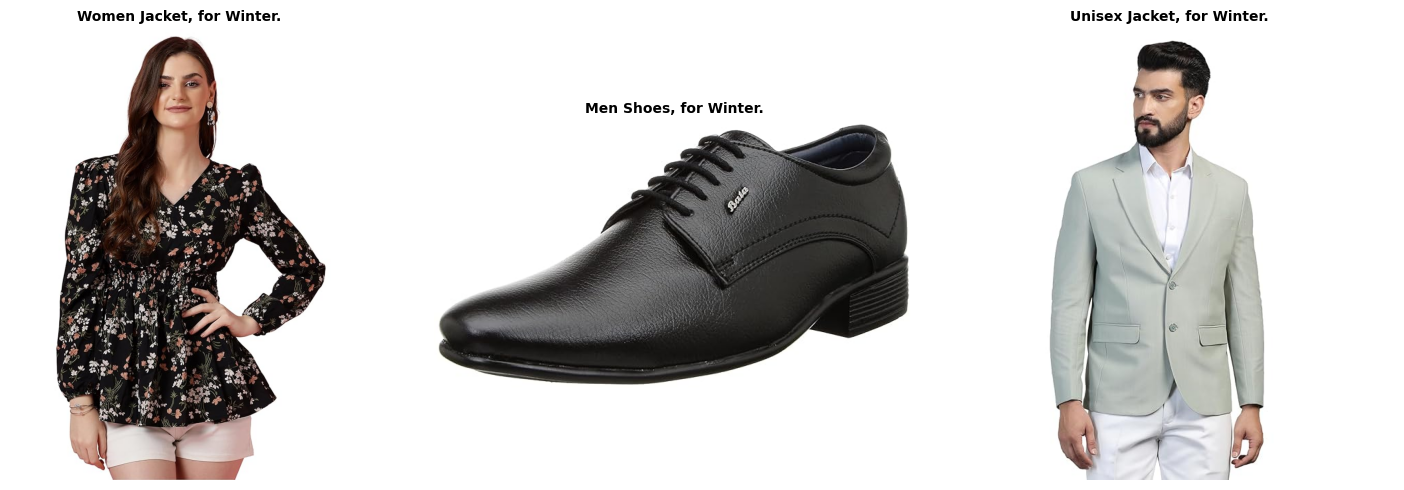

In [8]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# List of image paths
image_paths = ["/content/amazonsampleimage.jpg", "/content/shoe.jpg", "/content/coatsuit.jpg"]
images = [Image.open(img_path) for img_path in image_paths]

# Define categories for each attribute
product_types = ["T-shirt", "Shoes", "Jacket", "Coat"]
genders = ["Unisex", "Men", "Women"]
seasons = ["Winter", "Summer"]

# Combine all labels
labels = product_types + genders + seasons

# Process each image
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

for i, image in enumerate(images):
    # Process inputs
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)

    # Convert logits to probabilities
    probs = outputs.logits_per_image.softmax(dim=1)

    # Function to get the best label for a category
    def get_best_label(category_list):
        indices = [labels.index(c) for c in category_list]
        best_index = max(indices, key=lambda i: probs[0][i].item())
        return labels[best_index]

    # Get best predictions
    predicted_product = get_best_label(product_types)
    predicted_gender = get_best_label(genders)
    predicted_season = get_best_label(seasons)

    # Construct caption
    caption = f"{predicted_gender} {predicted_product}, for {predicted_season}."

    # Display the image with the caption
    axes[i].imshow(image)
    axes[i].axis("off")
    axes[i].set_title(caption, fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()


In [13]:
!pip install streamlit  pyngrok


In [14]:
%%writefile app.py
import streamlit as st
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Load CLIP model and processor
@st.cache_resource
def load_model():
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    return model, processor

model, processor = load_model()

# Define categories for each attribute
product_types = ["T-shirt", "Shoes", "Jacket", "Coat"]
genders = ["Unisex", "Men", "Women"]
seasons = ["Winter", "Summer"]

# Combine all labels
labels = product_types + genders + seasons

st.title("Fashion Product Classification using CLIP")
st.write("Upload an image, and the model will predict the product type, gender, and season.")

# File uploader
uploaded_files = st.file_uploader("Upload product images", type=["jpg", "png"], accept_multiple_files=True)

if uploaded_files:
    for uploaded_file in uploaded_files:
        image = Image.open(uploaded_file).convert("RGB")

        # Process inputs
        inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)
        outputs = model(**inputs)

        # Convert logits to probabilities
        probs = outputs.logits_per_image.softmax(dim=1)

        # Function to get the best label for a category
        def get_best_label(category_list):
            indices = [labels.index(c) for c in category_list]
            best_index = max(indices, key=lambda i: probs[0][i].item())
            return labels[best_index]

        # Get best predictions
        predicted_product = get_best_label(product_types)
        predicted_gender = get_best_label(genders)
        predicted_season = get_best_label(seasons)

        # Display image with caption
        st.image(image, caption=f"**{predicted_gender} {predicted_product}, suitable for {predicted_season}.**", use_column_width=True)


Writing app.py


In [34]:
from pyngrok import ngrok
import time

# Start Streamlit in the background
!streamlit run app.py &

# Wait for Streamlit to start
time.sleep(5)

# Expose Streamlit app via ngrok
public_url = ngrok.connect(port="8501")
print("Streamlit App URL:", public_url)


In [19]:
!ngrok authtoken 2ui1Y3E7nB9Ie5letS8x0VSZsjI_7do6Nm9VWNbaUDGo92hWE

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [22]:
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
print("Streamlit App is Live at:", public_url)



Streamlit App is Live at: NgrokTunnel: "https://6ae9-34-105-22-109.ngrok-free.app" -> "http://localhost:8501"


In [23]:
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.105.22.109:8501

⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://easy-dryers-itch.loca.lt
  Stopping...
^C


Application programming interface

In [31]:
!pip install fastapi uvicorn pyngrok transformers torch torchvision pillow
!pip install python-multipart


In [33]:
# Import necessary libraries
import uvicorn
from fastapi import FastAPI, File, UploadFile
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import nest_asyncio
from pyngrok import ngrok

# Initialize FastAPI app
app = FastAPI()

# Load CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define categories
product_types = ["T-shirt", "Shoes", "Jacket", "Coat"]
genders = ["Unisex", "Men", "Women"]
seasons = ["Winter", "Summer"]
labels = product_types + genders + seasons

def classify_image(image: Image.Image):
    """Classifies image into product type, gender, and season."""
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    probs = outputs.logits_per_image.softmax(dim=1)

    # Helper function to find the best match
    def get_best_label(category_list):
        indices = [labels.index(c) for c in category_list]
        best_index = max(indices, key=lambda i: probs[0][i].item())
        return labels[best_index]

    return {
        "product_type": get_best_label(product_types),
        "gender": get_best_label(genders),
        "season": get_best_label(seasons),
    }

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    """Receives an image, classifies it, and returns predictions."""
    image = Image.open(file.file).convert("RGB")
    prediction = classify_image(image)
    return {"message": "Prediction successful", "result": prediction}

# Start the FastAPI server in Colab
ngrok.set_auth_token("YOUR_NGROK_AUTHTOKEN")  # Replace with your ngrok auth token
public_url = ngrok.connect(8000).public_url
print(f"Public URL: {public_url}")

# Run the FastAPI server
nest_asyncio.apply()
uvicorn.run(app, host="0.0.0.0", port=8000)
